<a href="https://colab.research.google.com/github/IT24102088/Plant-Disease-Detection-System-PG-NO-147/blob/main/Notebooks/Histogram_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Histogram Equalization

Histogram Equalization is a preprocessing technique that enhances the contrast of images by spreading out the pixel intensity distribution. This is especially important for datasets where images have varying lighting conditions or some details are too dark or too bright.



*   Enhances subtle patterns or textures (like disease spots on leaves) that might be missed otherwise.
*   Helps the model focus on meaningful structures rather than being misled by lighting variations.

*   Supports better learning By providing more visually balanced images, the model can learn features more effectively, leading to higher accuracy.

In short, histogram equalization ensures that the model sees clear and informative inputs, which improves its ability to detect patterns and generalize to new images.






In [1]:
!pip install kaggle
import os
os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''



In [2]:
!kaggle datasets download -d "vipoooool/new-plant-diseases-dataset" -p /content/drive/MyDrive/datasets/

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
new-plant-diseases-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
from IPython.display import clear_output
!unzip /content/drive/MyDrive/datasets/new-plant-diseases-dataset.zip
clear_output()

Image loaded! Shape: (256, 256, 3)
Value range: [0 to 195]


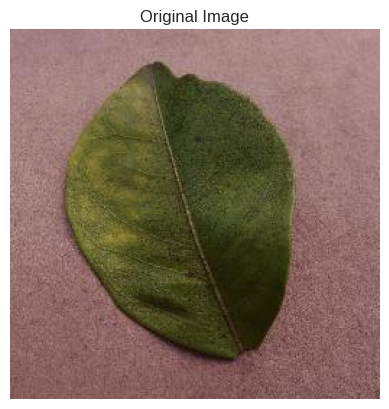

In [61]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

image_path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Orange___Haunglongbing_(Citrus_greening)/0342765a-469b-4287-bdac-2c48875cc7f5___CREC_HLB 7706.JPG"

img = Image.open(image_path)
img_array = np.array(img)

print(f"Image loaded! Shape: {img_array.shape}")
print(f"Value range: [{img_array.min()} to {img_array.max()}]")

plt.imshow(img_array)
plt.title("Original Image")
plt.axis('off')
plt.show()

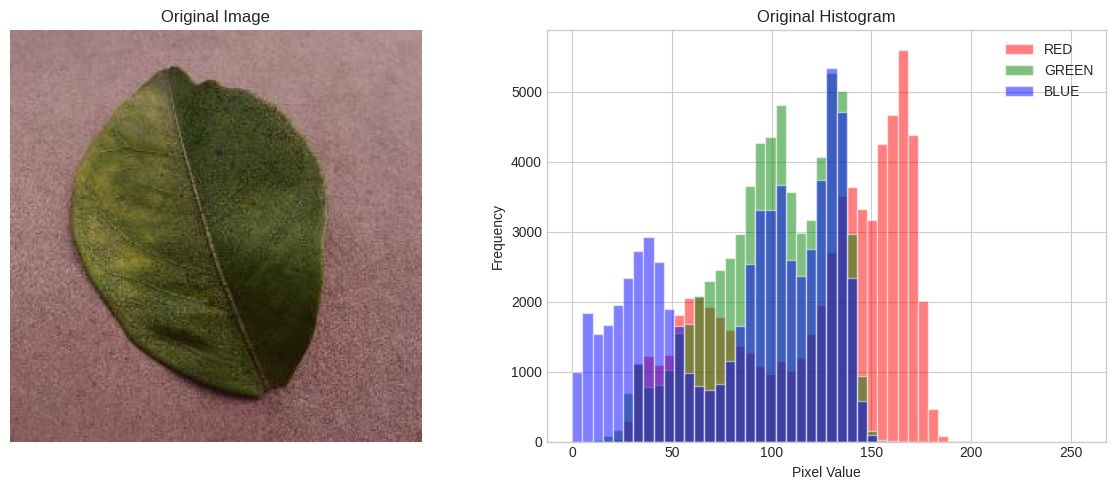

In [62]:
plt.figure(figsize=(12, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray' if len(img_array.shape) == 2 else None)
plt.title("Original Image")
plt.axis('off')

# Original histogram
plt.subplot(1, 2, 2)
if len(img_array.shape) == 3:
    # Color image - show histogram for each channel
    colors = ['red', 'green', 'blue']
    for i, color in enumerate(colors):
        channel = img_array[:, :, i].flatten()
        plt.hist(channel, bins=50, alpha=0.5, color=color, label=color.upper(), range=(0, 255))
    plt.legend()
else:
    # Grayscale image
    plt.hist(img_array.flatten(), bins=50, alpha=0.7, color='gray', range=(0, 255))
plt.title("Original Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig('original_histogram.png', bbox_inches='tight')
plt.show()

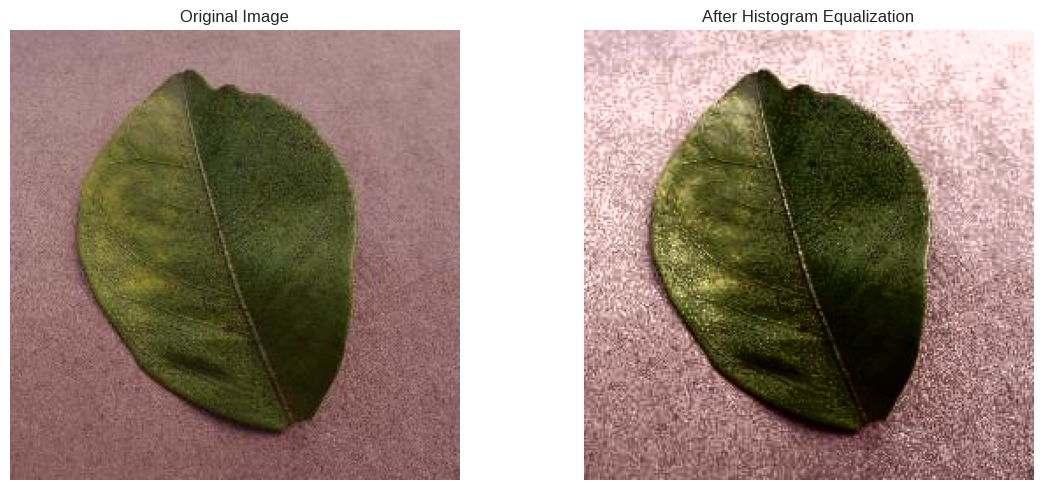

In [63]:
# Apply histogram equalization
def apply_histogram_equalization(image):
    """Apply histogram equalization to an image"""
    if len(image.shape) == 3:
        # Color image - convert to YUV and equalize Y channel only
        yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        yuv[:, :, 0] = cv2.equalizeHist(yuv[:, :, 0])
        equalized = cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB)
    else:
        # Grayscale image
        equalized = cv2.equalizeHist(image)
    return equalized

# Apply the equalization
equalized_img = apply_histogram_equalization(img_array)

# Show before and after
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img)
plt.title("After Histogram Equalization")
plt.axis('off')

plt.tight_layout()
plt.savefig('histogram_equalization_comparison.png', bbox_inches='tight')
plt.show()

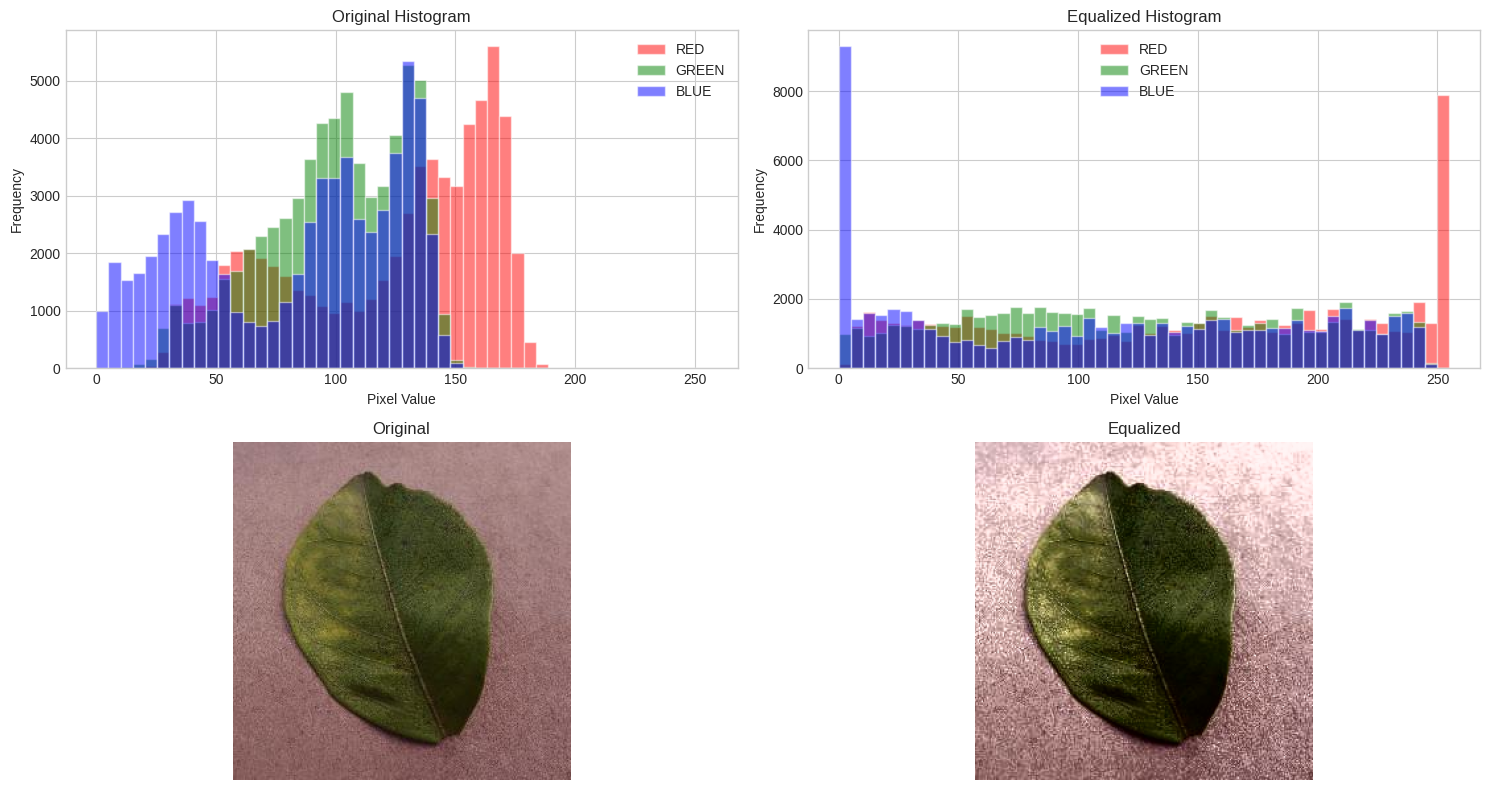

In [64]:
# Now let's compare the histograms before and after
plt.figure(figsize=(15, 8))

# Before equalization
plt.subplot(2, 2, 1)
if len(img_array.shape) == 3:
    colors = ['red', 'green', 'blue']
    for i, color in enumerate(colors):
        channel = img_array[:, :, i].flatten()
        plt.hist(channel, bins=50, alpha=0.5, color=color, label=color.upper(), range=(0, 255))
    plt.legend()
else:
    plt.hist(img_array.flatten(), bins=50, alpha=0.7, color='gray', range=(0, 255))
plt.title("Original Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

# After equalization
plt.subplot(2, 2, 2)
if len(equalized_img.shape) == 3:
    colors = ['red', 'green', 'blue']
    for i, color in enumerate(colors):
        channel = equalized_img[:, :, i].flatten()
        plt.hist(channel, bins=50, alpha=0.5, color=color, label=color.upper(), range=(0, 255))
    plt.legend()
else:
    plt.hist(equalized_img.flatten(), bins=50, alpha=0.7, color='gray', range=(0, 255))
plt.title("Equalized Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

# Side-by-side image comparison
plt.subplot(2, 2, 3)
plt.imshow(img_array)
plt.title("Original")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(equalized_img)
plt.title("Equalized")
plt.axis('off')

plt.tight_layout()
plt.savefig('histogram_comparison.png', bbox_inches='tight', dpi=120)
plt.show()

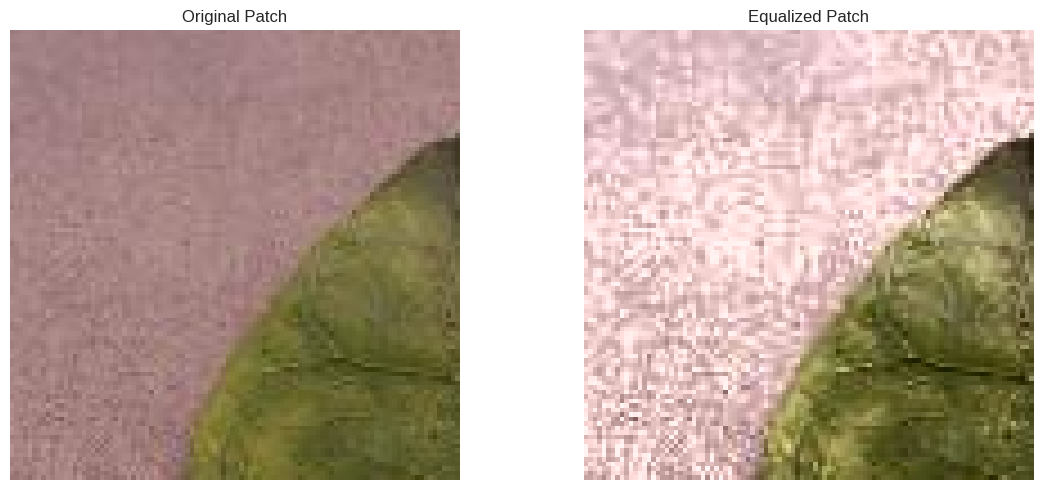

In [65]:
# Let's examine a small area to see the details better
patch_size = 100
patch_original = img_array[:patch_size, :patch_size]
patch_equalized = equalized_img[:patch_size, :patch_size]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(patch_original)
plt.title("Original Patch")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(patch_equalized)
plt.title("Equalized Patch")
plt.axis('off')

plt.tight_layout()
plt.savefig('patch_comparison.png', bbox_inches='tight')
plt.show()